# 22667391_Huỳnh Nhật Hoàng

Model

https://drive.google.com/file/d/13yJPdo9ZPoa2vvUZde0mtEJWnVHEfJDQ/view?usp=drive_link

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']


CÂU 1 (2 điểm): XÂY DỰNG KIẾN TRÚC CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = keras.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 4
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Dense 128 + Dropout
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

test_model = build_cnn_model()
test_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,634 (1010.29 KB)

 Trainable params: 258,634 (1010.29 KB)

 Non-trainable params: 0 (0.00 B)

# CÂU 2 (2 điểm): LOAD VÀ TEST MODEL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_DIR = '/content/drive/MyDrive/ThiGK-TGMT-16-22667391-13'
import os, glob
os.chdir(BASE_DIR)
print('CWD =', os.getcwd())
!ls -lah

#Bước 2: Load mô hình from tensorflow import keras import numpy as np
MODEL_PATH = os.path.join(BASE_DIR, 'cifar10_model.h5')
X_PATH = os.path.join(BASE_DIR, 'new_test_samples.npy')
Y_PATH = os.path.join(BASE_DIR, 'new_test_labels.npy')
for p in [MODEL_PATH, X_PATH, Y_PATH]: assert os.path.exists(p), f"Không thấy file: {p}"
model = keras.models.load_model(MODEL_PATH)
X = np.load(X_PATH)
y_true = np.load(Y_PATH).astype(int)
print("Shapes:", X.shape, y_true.shape)

#Bước 3: Dự đoán & tính accuracy
from sklearn.metrics import accuracy_score
y_prob = model.predict(X)
y_pred = np.argmax(y_prob, axis=1)

acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")


CWD = /content/drive/MyDrive/ThiGK-TGMT-16-22667391-13
total 82M
-rw------- 1 root root  82M Sep 29 02:27 cifar10_model.h5
-rw------- 1 root root  148 Sep 29 05:47 new_test_labels.npy
-rw------- 1 root root 241K Sep 29 05:47 new_test_samples.npy
-rw------- 1 root root 3.5K Sep 29 05:57 ThiGK-TGMT-16-22667391-13


Shapes: (20, 32, 32, 3) (20,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Accuracy: 0.9000 (90.00%)


 # CÂU 3 (2 điểm): PHÂN TÍCH KẾT QUẢ

# a) Vẽ confusion matrix với colormap 'Greens' (1 điểm)

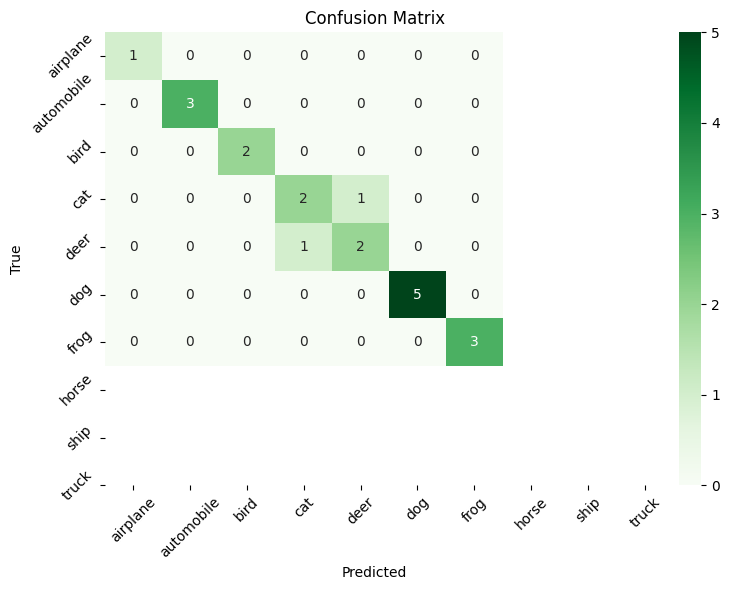

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):

  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.xticks(rotation = 45)
  plt.yticks(rotation = 45)
  plt.tight_layout()
  plt.show()
  return cm
cm = plot_confusion_matrix(y_true, y_pred, class_names)


# b) Tính precision, recall, f1-score cho từng class (1 điểm)

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def print_classification_report(y_true, y_pred, class_names):
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average=None, labels=range(len(class_names))
    )

    print("\n" + "="*65)
    print("CHI TIẾT METRICS CHO TỪNG CLASS (support > 0)")
    print("="*65)
    print(f"{'Class':<12} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<8}")
    print("-" * 65)

    valid_idx = support > 0
    for i in np.where(valid_idx)[0]:
        print(f"{class_names[i]:<12} {precision[i]:<10.4f} {recall[i]:<10.4f} "
              f"{f1[i]:<10.4f} {support[i]:<8}")

    macro_precision = np.mean(precision[valid_idx])
    macro_recall = np.mean(recall[valid_idx])
    macro_f1 = np.mean(f1[valid_idx])

    weighted_precision = np.sum(precision[valid_idx] * support[valid_idx]) / np.sum(support[valid_idx])
    weighted_recall = np.sum(recall[valid_idx] * support[valid_idx]) / np.sum(support[valid_idx])
    weighted_f1 = np.sum(f1[valid_idx] * support[valid_idx]) / np.sum(support[valid_idx])

    print("-" * 65)
    print(f"{'Macro Avg':<12} {macro_precision:<10.4f} {macro_recall:<10.4f} {macro_f1:<10.4f}")
    print(f"{'Weighted Avg':<12} {weighted_precision:<10.4f} {weighted_recall:<10.4f} {weighted_f1:<10.4f}")
    print("="*65)

print_classification_report(y_true, y_pred, class_names)


CHI TIẾT METRICS CHO TỪNG CLASS (support > 0)
Class        Precision  Recall     F1-Score   Support 
-----------------------------------------------------------------
airplane     1.0000     1.0000     1.0000     1       
automobile   1.0000     1.0000     1.0000     3       
bird         1.0000     1.0000     1.0000     2       
cat          0.6667     0.6667     0.6667     3       
dog          0.6667     0.6667     0.6667     3       
ship         1.0000     1.0000     1.0000     5       
truck        1.0000     1.0000     1.0000     3       
-----------------------------------------------------------------
Macro Avg    0.9048     0.9048     0.9048    
Weighted Avg 0.9000     0.9000     0.9000    


 CÂU 4 (2 điểm): HIỂN THỊ KẾT QUẢ VÀ BIỂU ĐỒ PHÂN TÍCH

# a) Hiển thị 12 ảnh đầu với layout 2x3, nhãn dự đoán + confidence score (1 điểm)

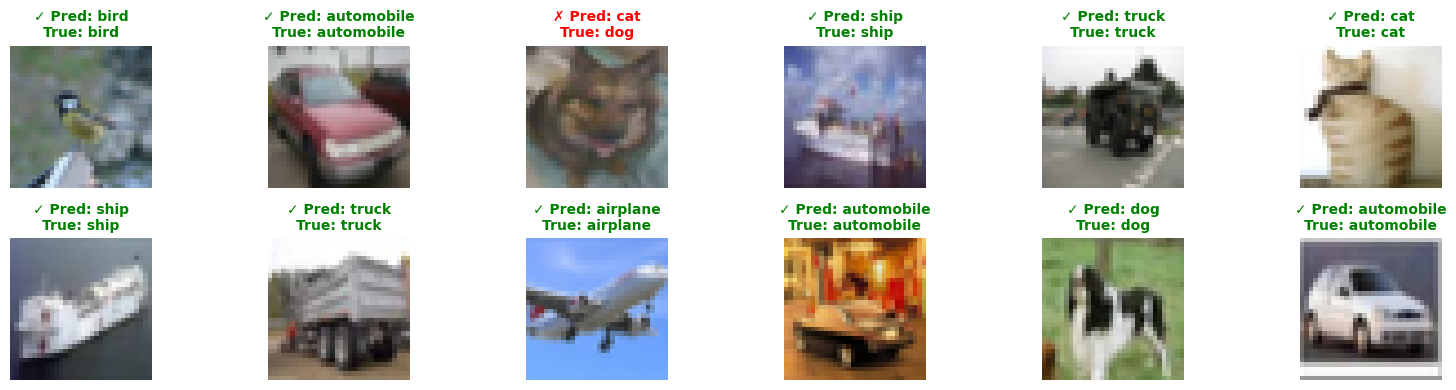

In [ ]:
def display_predictions(images, true_labels, pred_labels, class_names, n_samples=12):
  plt.figure(figsize=(16, 4))
  for i in range(n_samples):
    plt.subplot(2, 6, i+1)
    plt.imshow(images[i])
    plt.axis('off')

    true_label = class_names[true_labels[i]]
    pred_label = class_names[pred_labels[i]]

    if true_labels[i] == pred_labels[i]:
      color = 'green'
      mark = '✓'
    else:
      color = 'red'
      mark = '✗'
    plt.title(f"{mark} Pred: {pred_label}\nTrue: {true_label}", color = color, fontsize= 10, weight='bold')
  plt.tight_layout()
  plt.show()

display_predictions(X, y_true, y_pred, class_names, 12)

# b) Vẽ biểu đồ F1-score theo từng class (1 điểm)

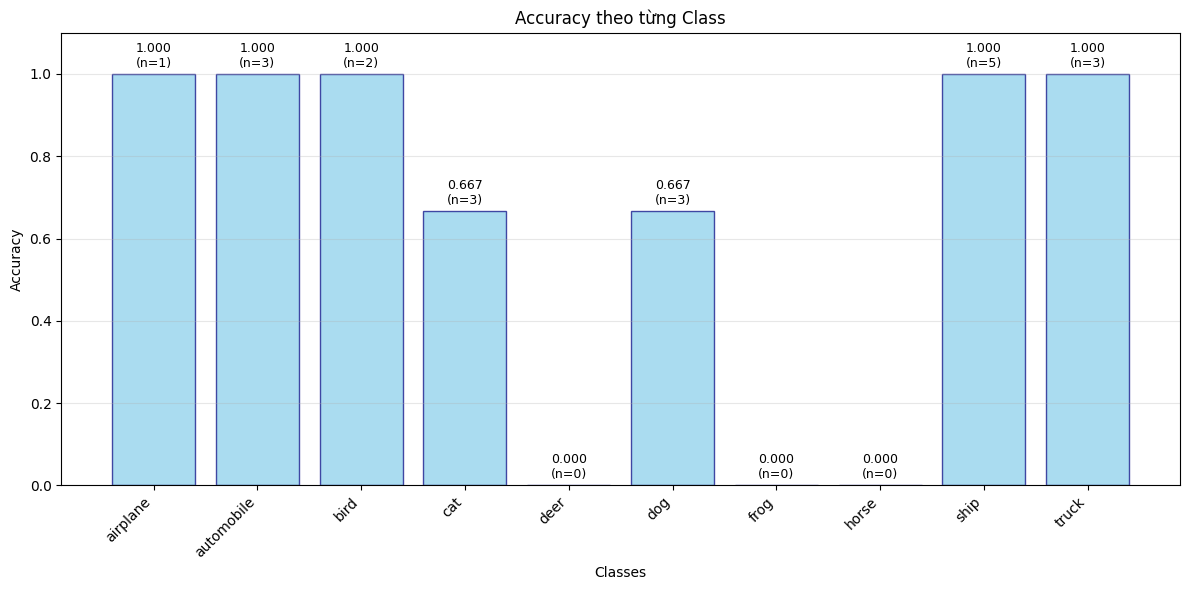

In [ ]:
def class_f1_scores(y_true, y_pred, class_names):
    class_accuracies = []
    class_counts = []

    for i in range(len(class_names)):
        class_mask = (y_true == i)
        if np.sum(class_mask) > 0:
            class_pred = y_pred[class_mask]
            class_true = y_true[class_mask]
            accuracy = accuracy_score(class_true, class_pred)
            class_accuracies.append(accuracy)
            class_counts.append(np.sum(class_mask))
        else:
            class_accuracies.append(0)
            class_counts.append(0)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(class_names)), class_accuracies,
                   color='skyblue', edgecolor='navy', alpha=0.7)

    for i, (bar, acc, count) in enumerate(zip(bars, class_accuracies, class_counts)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}\n(n={count})', ha='center', va='bottom', fontsize=9)

    plt.xlabel('Classes')
    plt.ylabel('Accuracy')
    plt.title('Accuracy theo từng Class')
    plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
    plt.ylim(0, 1.1)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return class_accuracies, class_counts

class_acc, class_counts = class_f1_scores(y_true, y_pred, class_names)


# CÂU 5 (2 điểm): BÁO CÁO NGẮN VỀ ĐÁNH GIÁ HIỆU SUẤT VÀ ĐỀ XUẤT CẢI THIỆN

**F1-score macro average**

Kết quả đánh giá cho thấy F1-score macro average = 0.9048, phản ánh hiệu suất chung khá cao và cân bằng giữa Percision và Recall trên các lớp có dữ liệu test.

**Class có F1-score cao nhất/thấp nhất**

F1-score cao nhất (1.000): airplane, automobile, bird, ship, truck. Các lớp này được mô hình dự đoán chính xác tuyệt đối trên tập test (support > 0)

F1-score thấp nhất (0.6667): cat, dog. Mô hình gặp khó khăn hơn trong việc phân loại các lớp này, dẫn đến nhầm lẫn nhiều hơn.

**Phân tích top-2 errors trong confusion matrix**

Quan sát confusion matrix ta thấy:

1. Cat -> Deer (1 mẫu): 1 ảnh mèo bị nhầm thành hưu, có thể do màu sắc/hoa văn tương đồng hoặc ảnh không rõ đặc trưng.
2. Deer -> Cat (1 mẫu): 1 ảnh hưu bị nhầm thành mèo, tương tự do đặc trung ngoại hình dễ gây nhầm lẫn.

Các lỗi chủ yếu chủ yếu xảy ra trong nhóm động vật do sự tương đồng cao, trong khi các lớp phương tiện được phân biệt tốt hơn.

**Đề xuất phương pháp cải thiện**
- Data Augmentation: Sử dụng xoay, lật, zoom thay đổi sáng tối để tăng tính đa dạng dữ liệu.
- Tăng độ sâu mô hình: Thêm nhiều tầng convolution/filter để học được đặc trưng chi tiết
- Transfer learning: Fine-tune các mô hình mạnh trên tập Cifar-10 (ResNet, VGG, EficientNet)
- Class balancing: Dùng oversampling hoặc weight trong los funtion nếu dữ liệu mất cân bằng.
- Regularization & Dropout hợp lý: Giúp giảm overfitting, tăng khả năng tổng quát hóa.

**Kết luận**

Mô hình đạt kết quả tốt với F1-score = 0.90, thể hiện khả năng phân loại chính xác trên đã số lớp. Tuy nhiên, với các lớp cat, dog, deer, cần áp dụng kĩ thuật tăng cường dữ liệu và cải thiện kiến trúc để đạt hiệu suất cao hơn.